# HW01: Intro to Text Data

In this assignment, we will explore how to load a text classification dataset (AG's news, originally posted [here](http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html)), how we can preprocess the data and extract useful information from a real-world dataset. First, we have to download the data; we only download a subset of the data with four classes.

In [79]:
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

--2023-03-02 20:28:32--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv.2’

train.csv.2         100%[===================>]  28.10M  1.20MB/s    in 19s     

2023-03-02 20:28:51 (1.47 MB/s) - ‘train.csv.2’ saved [29470338/29470338]



## Inspect Data

In [80]:
import pandas as pd
df = pd.read_csv("train.csv", header=None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       120000 non-null  int64 
 1   1       120000 non-null  object
 2   2       120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


,0,1,2
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


Let's make the data more human readable by adding a header and replacing labels

In [81]:
df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 

In [82]:
df.head()

,label,title,lead
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [83]:
# TODO implement a new column text which contains the lowercased title and lead (concatenated with space)
df["text"] = df['title'].str.lower() + df['lead'].str.lower()

# Check if it worked
df.head()

,label,title,lead,text
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",wall st. bears claw back into the black (reute...
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,carlyle looks toward commercial aerospace (reu...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,oil and economy cloud stocks' outlook (reuters...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,iraq halts oil exports from main southern pipe...
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","oil prices soar to all-time record, posing new..."


In [84]:
# TODO print the number of documents for each label
df["label"].value_counts()

business    30000
sci/tech    30000
sport       30000
world       30000
Name: label, dtype: int64

## Document Length

0     7
1    13
2    12
3     9
4     9
Name: num_stop_words, dtype: int64
[13.362466666666666, 13.665366666666667, 12.108133333333333, 12.968233333333334]


<BarContainer object of 4 artists>

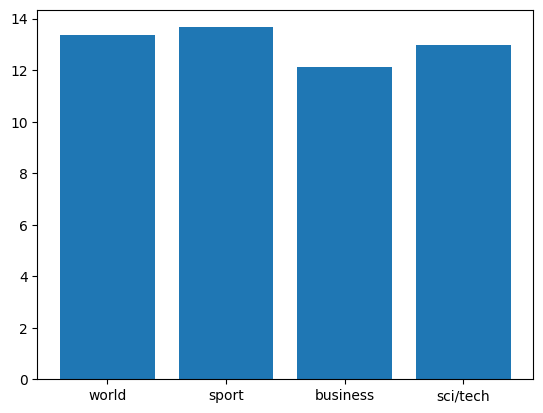

In [93]:
# TODO create a new column with the number of non-stop words in each text
# TODO plot the average number of non-stop words per label

#from nltk.corpus import stopwords
#stopwords = set(stopwords.words('english'))
#pytstopwords
from nltk.tokenize import word_tokenize
from spacy.lang.en import stop_words

#
# NAIVE IMPLEMENTATION. I also tokenized it becuase otherwise the results are bullshit.
#

# Get stopwords
stopwords = stop_words.STOP_WORDS

# Function to count stop words in a sentence
def count_stop_words(sentence):
    # Tokenize the sentence
    tokens = word_tokenize(sentence)
    
    # Init counter
    count = 0
    
    # Loop over all stopwords
    for stopword in stopwords:
        # Count the times stopwords shows up
        count += tokens.count(stopword)
    
    return count
    
# Create new column containing amount of stop words for each column text
df["num_stop_words"] = df["text"].apply(count_stop_words)

# Print top 5 entries for testing purposes
print(df["num_stop_words"].head(5))


labels =  ["world", "sport", "business", "sci/tech"]

averages = [0, 0, 0, 0]

for i, label in enumerate(labels):
    # Get indices of rows for la
    idxs = df["label"] == label
    
    # Get all rows with label
    df_tmp = df[idxs]
    
    # Compute mean
    average = df_tmp["num_stop_words"].mean()
    
    # Store mean
    averages[i] = average

print(averages)

# Plot averages
plt.bar([0, 1, 2, 3], averages, tick_label=labels)

## Word Frequency 

Let's implement a keyword search (similar to the baker-bloom economic uncertainty) and compute how often some given keywords ("play", "tax", "blackberry", "israel") and numbers appear in the different classes in our data

In [124]:
import re

keywords = ["play", "tax", "blackberry", "israel"]

for keyword in keywords:
    #TODO implement a regex pattern for keyword
    pattern_raw = rf"\b{keyword}[a-z]*"
    
    # Compile pattern
    pattern = re.compile(pattern_raw, re.IGNORECASE)
    def count_keyword_frequencies(text):
        #TODO implement a function which counts how often a pattern appears in a text
        num_occurrences = len(pattern.findall(text))

        return num_occurrences
    
    # Now, we can print how often a keyword appears in the data
    df_new = df["text"].apply(count_keyword_frequencies)
    print(df_new.sum())
    
    # and we want to find out how often the keyword appears withhin each class
    for label in df["label"].unique():
        print ("label:", label,", keyword:", keyword)
        #TODO print how often the keyword appears in this class
        idxs = df["label"] == label
        
        print(df_new[idxs].sum())
        
    print ("\n" + "*" * 100)
    

7630
label: business , keyword: play
317
label: sci/tech , keyword: play
1536
label: sport , keyword: play
5449
label: world , keyword: play
328

****************************************************************************************************
1536
label: business , keyword: tax
1184
label: sci/tech , keyword: tax
93
label: sport , keyword: tax
31
label: world , keyword: tax
228

****************************************************************************************************
233
label: business , keyword: blackberry
44
label: sci/tech , keyword: blackberry
189
label: sport , keyword: blackberry
0
label: world , keyword: blackberry
0

****************************************************************************************************
3299
label: business , keyword: israel
25
label: sci/tech , keyword: israel
63
label: sport , keyword: israel
62
label: world , keyword: israel
3149

****************************************************************************************************

As a last exercise, we re-use the fuzzy keyword search implemented above and plot the total number of occurrences of "tax" (and it's variations, e.g. taxation, taxes etc.) for each class in the dataset. Hint: have a look at the [pandas bar plot with group by](https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot)

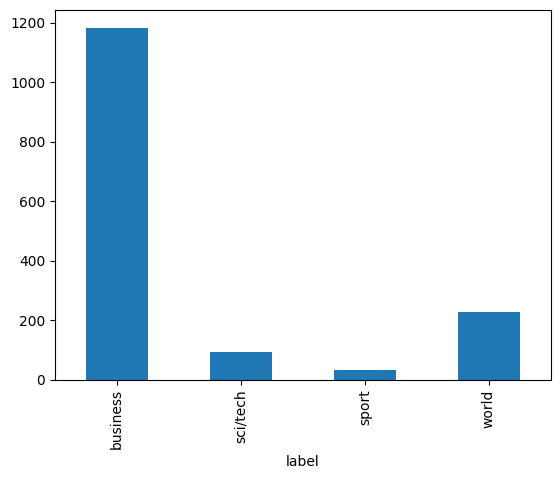

In [128]:
import matplotlib.pyplot as plt

keyword = "tax"
pattern = re.compile(rf"\b{keyword}[a-z]*")

def count_keyword_frequencies(text):
    #TODO implement a function which counts the total number of the word "tax" (and other fuzzy matches of tax) appearing in a given text
    num_occurrences = len(pattern.findall(text))
    
    return num_occurrences

df["counts"] = df["text"].apply(count_keyword_frequencies)

#TODO create a bar plot for the wordcounts of "tax" for each class in the dataset
df.groupby('label')['counts'].sum().plot(kind='bar')
plt.show()


In [129]:
import os

os.system('jupyter nbconvert --to html homework_01.ipynb')

[NbConvertApp] Converting notebook homework_01.ipynb to html
[NbConvertApp] Writing 641825 bytes to homework_01.html


0

In [130]:
!open homework_01.html

/bin/bash: line 1: open: command not found
